In [2]:
import numpy as np
import os
import re
import pandas as pd
import random
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import math
from matplotlib.pyplot import MultipleLocator


In [3]:
def border():
    bwith = 2 #边框宽度设置为2
    ax = plt.gca()#获取边框
    ax.tick_params(axis="x", direction="in", length=16, width=5, color="k")
    ax.tick_params(axis="x", direction="in", length=16, width=5, color="k")
    # ax.spines['top'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['right'].set_color('grey')  # 设置右‘脊梁’为无色
    # ax.spines['left'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['bottom'].set_color('none')  # 设置右‘脊梁’为无色
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
ft = 60 # font size
lw = 5 # line width
ms = 25 # marker size
color = ['darkblue','darkgreen','darkorange','darkviolet','darkred']
marker = ["o", "v", "s", "^", "D", "o"]
linestyle = [(0, ()), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4))]
lw = 8

type = ["Full", "Bias-tuning", "Freezing"]

bws = [0.1,0.5,1,5,10]

In [9]:
datapoint = 32 
latency = datapoint
bitfit_latency = latency * 0.5
freeze_latency = latency * 8 / 24

comm = 1000
bitfit_comm = comm * 0.001
freeze_comm = comm * 7 / 24

In [10]:
# comm.
# [tx2 + bitfit, ]

[[21024.0, 5024.0, 3024.0, 1424.0, 1224.0], [532.0, 516.0, 514.0, 512.4, 512.2], [6174.666666666666, 1508.0, 924.6666666666667, 458.0, 399.66666666666663]]


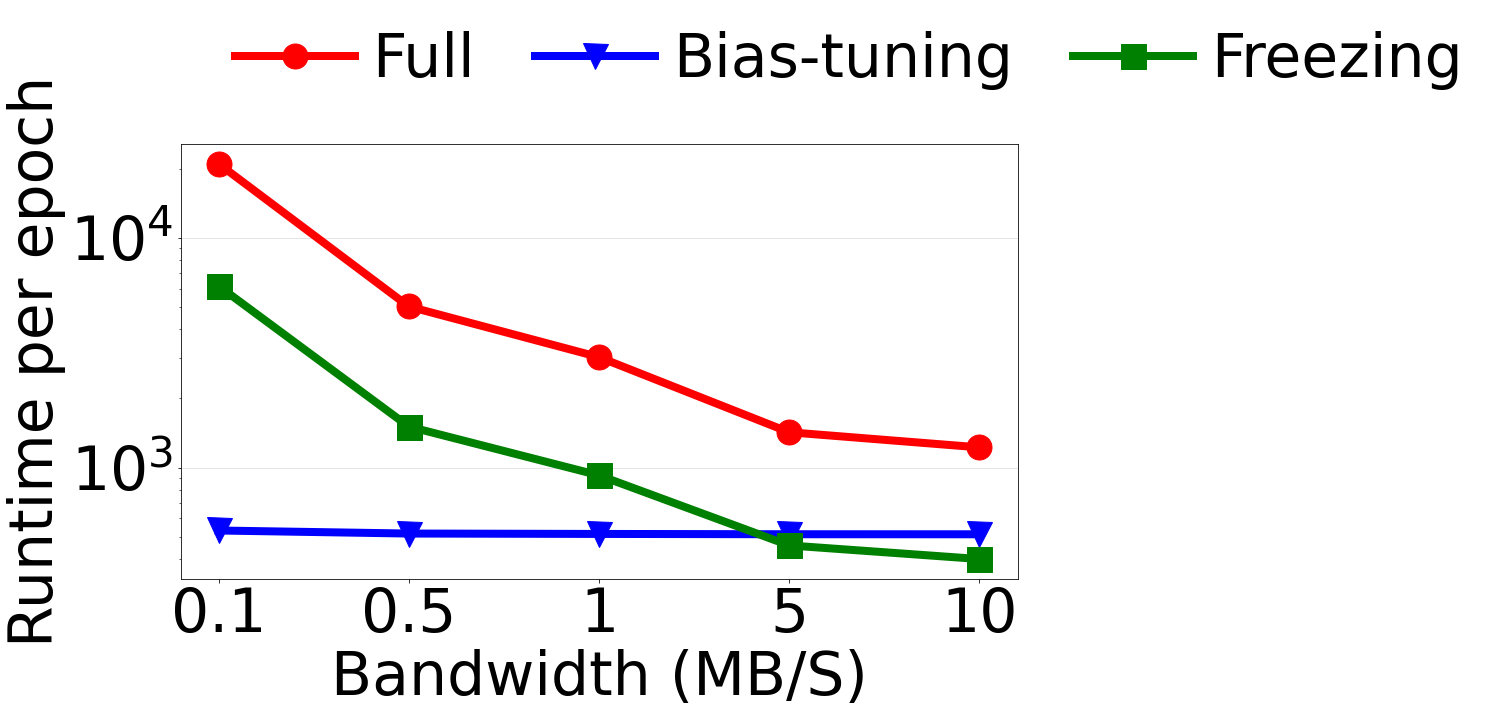

In [11]:
runtime = [[latency * datapoint + comm * 2 / bw for bw in bws], [bitfit_latency * datapoint + bitfit_comm * 2 / bw for bw in bws], [freeze_latency * datapoint + freeze_comm * 2 / bw for bw in bws]]
fig = plt.figure(figsize=(15,8))
# 设置刻度字体大小
# plt.title("Text Classification (20news)",fontsize=ft)
# 设置刻度字体大小
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlabel("Bandwidth (MB/S)", fontsize=ft)
plt.ylabel("Runtime per epoch", fontsize=ft)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)

# plt.set_yscale('log')

# x_major_locator=MultipleLocator(0.2)
# y_major_locator=MultipleLocator(1)
ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# ax.yaxis.set_major_locator(y_major_locator)
ax.set_yscale('log')

for i in range(3):
    # if i == 1 or i == 2 or i == 3:
    #     continue
    # log_runtime = [math.log(i, 10) for i in runtime[i]]
    plt.plot(range(5), runtime[i], linewidth = lw, color=color[i], marker=marker[i], markersize = ms, label=type[i])

plt.xticks(range(5), bws)
print(runtime)

plt.legend(fontsize=60,ncol = 5,loc="lower left", bbox_to_anchor=(0., 1),frameon=False,columnspacing = 1.0,handletextpad=0.3)
plt.savefig('/Users/cdq/Desktop/opensource/FedPrompt/figs/bitfit/tx2.pdf', bbox_inches="tight")

In [38]:
# rpi
datapoint = 100
latency = 4 * 15
bitfit_latency = latency * 0.5
freeze_latency = latency * 8 / 24

comm = 1000
bitfit_comm = comm * 0.001
freeze_comm = comm * 8 / 24

[[26000.0, 10000.0, 8000.0, 6400.0, 6200.0], [3020.0, 3004.0, 3002.0, 3000.4, 3000.2], [8666.666666666666, 3333.333333333333, 2666.6666666666665, 2133.3333333333335, 2066.6666666666665]]


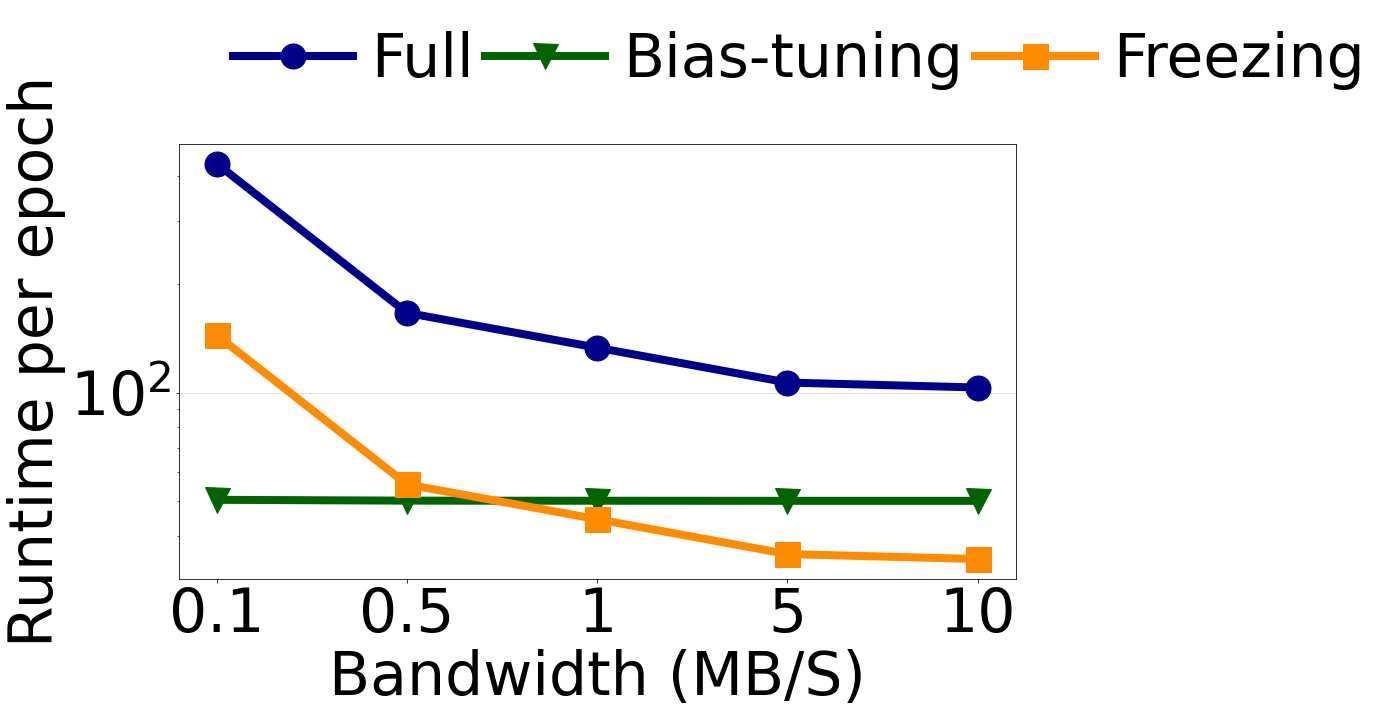

In [46]:
runtime = [[latency * datapoint + comm * 2 / bw for bw in bws], [bitfit_latency * datapoint + bitfit_comm * 2 / bw for bw in bws], [freeze_latency * datapoint + freeze_comm * 2 / bw for bw in bws]]
fig = plt.figure(figsize=(15,8))
# 设置刻度字体大小
# plt.title("Text Classification (20news)",fontsize=ft)
# 设置刻度字体大小
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.xlabel("Bandwidth (MB/S)", fontsize=ft)
plt.ylabel("Runtime per epoch", fontsize=ft)
plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)

# plt.set_yscale('log')

# x_major_locator=MultipleLocator(0.2)
# y_major_locator=MultipleLocator(1)
ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# ax.yaxis.set_major_locator(y_major_locator)
ax.set_yscale('log')

for i in range(3):
    # if i == 1 or i == 2 or i == 3:
    #     continue
    # log_runtime = [math.log(i, 10) for i in runtime[i]]
    plt.plot(range(5), np.array(runtime[i])/60, linewidth = lw, color=color[i], marker=marker[i], markersize = ms, label=type[i])

plt.xticks(range(5), bws)
print(runtime)

plt.legend(fontsize=60,ncol = 5,loc="lower left", bbox_to_anchor=(0., 1),frameon=False,columnspacing = 0.2,handletextpad=0.3)
plt.savefig('/Users/cdq/Desktop/opensource/FedPrompt/figs/bitfit/rpi.pdf', bbox_inches="tight")

In [7]:
# rpi
datapoint = 32
latency = 15 * datapoint # bs = 4, tx2 latenct: 4s
bitfit_latency = latency * 0.5
freeze_latency = latency * 8 / 24

comm = 1000
bitfit_comm = comm * 0.001
freeze_comm = comm * 8 / 24

In [8]:
latency

480

In [6]:
bitfit_latency

30.0

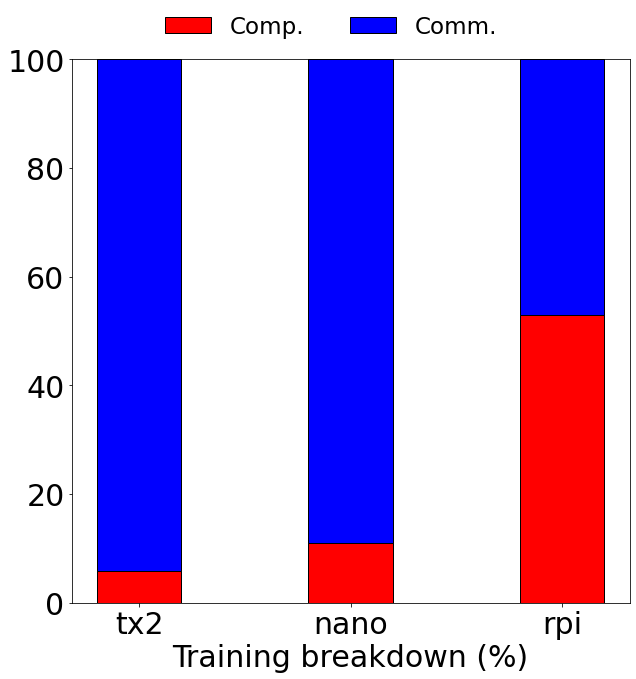

In [4]:
fs = 30
# opBreakdown (percentage bar)

comm_full = np.array([comm, bitfit_comm, freeze_comm]) # compute
op2 = np.array([110.01 * 4 * 2] * 3) # communicate 

devices = ["tx2", "nano", "rpi"]
color = ['red', 'blue', 'green', '#FF8C00', '#9370DB', 'hotpink']
# 横向
bottom = 0
plt.figure(figsize=(10,10))
plt.xlabel("Training breakdown (%)", fontsize=fs)
plt.ylim(0,100)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.bar(devices, op1_regular, width=0.4, label="Comp.", color=color[0],edgecolor='black')

bottom = bottom + op1_regular
plt.bar(devices, op2_regular, width=0.4, label="Comm.", color=color[1], bottom=bottom,edgecolor='black')

plt.legend(fontsize=23, loc=4, ncol=4, bbox_to_anchor=(0.8, 1), frameon=False)

plt.savefig('/Users/cdq/Desktop/opensource/FedPrompt/figs/bitfit/breakdown.pdf', bbox_inches="tight")